In [33]:
import pandas as pd
import numpy as np
import os

In [34]:
os.chdir(r'C:\Users\HP\Desktop\PYTHON AND DATA SCIENCE - Copy')

In [35]:
dataset=pd.read_csv("startup regression.csv")

In [36]:
dataset

,Unnamed: 0,R&D spend,administtration,marketing spend,state,profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [39]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (45, 6)
Unseen Data For Predictions: (5, 6)


In [40]:
from pycaret.regression import *

In [41]:

exp_reg101 = setup(data = data, target = 'profit', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(45, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,4422.88,5.89894e+07,6101.33,0.9525,0.1389,0.095
1,Extra Trees Regressor,5194.02,7.10643e+07,6166.32,0.9198,0.1097,0.1186
2,Random Forest,5447.72,9.10424e+07,7026.28,0.9073,0.1189,0.1322
3,AdaBoost Regressor,6441.86,1.0488e+08,8217.67,0.8714,0.1705,0.1324
4,Elastic Net,7992.33,1.0453e+08,9149.04,0.8497,0.1469,0.1525
5,Orthogonal Matching Pursuit,8402.56,1.13947e+08,9783.73,0.848,0.1542,0.1543
6,Random Sample Consensus,8782.74,1.29749e+08,10258.9,0.8208,0.1664,0.1694
7,Ridge Regression,8557.74,1.19826e+08,9866.86,0.8176,0.1565,0.161
8,TheilSen Regressor,8685.63,1.24808e+08,10130.8,0.816,0.1591,0.1616
9,Lasso Least Angle Regression,8670.06,1.23671e+08,10032.6,0.8088,0.1586,0.1627


In [44]:
 xgboost= create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7581.2814,1.615281e+08,12709.3693,0.8899,0.0718,0.0424
1,2151.5024,5.805811e+06,2409.5252,0.9452,0.0165,0.0148
2,3032.8984,1.380693e+07,3715.7682,0.9589,0.0298,0.0246
3,8684.0123,1.490518e+08,12208.6786,0.9640,0.5057,0.2061
4,2459.8997,1.517694e+07,3895.7594,0.9740,0.0994,0.0551
5,1541.3455,3.120482e+06,1766.4887,0.9915,0.0130,0.0119
6,10284.6208,1.790036e+08,13379.2245,0.9549,0.5174,0.5023
7,2190.6032,5.738715e+06,2395.5614,0.9914,0.0233,0.0201
8,5425.5891,5.548660e+07,7448.9328,0.8570,0.1030,0.0648
9,877.0074,1.174999e+06,1083.9736,0.9982,0.0093,0.0081


In [45]:
#trained model object is stored in the variable 'ada'. 
print('xgboost')

xgboost


In [46]:
tuned_xgboost = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6721.1950,7.098123e+07,8425.0358,0.9516,0.0544,0.0476
1,4414.1163,2.421793e+07,4921.1718,0.7713,0.0326,0.0291
2,2803.9682,8.554632e+06,2924.8302,0.9745,0.0237,0.0231
3,7227.5842,6.741516e+07,8210.6737,0.9837,0.2126,0.1221
4,5088.2888,2.733824e+07,5228.5980,0.9532,0.0868,0.0765
5,2152.5123,6.208521e+06,2491.6905,0.9831,0.0186,0.0168
6,17560.9423,4.395079e+08,20964.4428,0.8893,0.6959,0.8352
7,4487.4615,3.452287e+07,5875.6165,0.9484,0.0588,0.0410
8,5540.9213,3.819248e+07,6180.0066,0.9016,0.0518,0.0503
9,6303.7961,4.591754e+07,6776.2483,0.9288,0.0673,0.0656


In [47]:
print(tuned_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


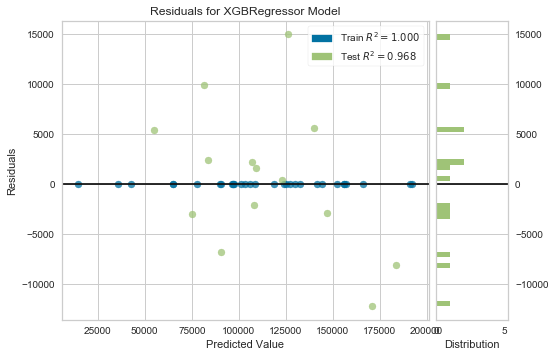

In [48]:
plot_model(tuned_xgboost)

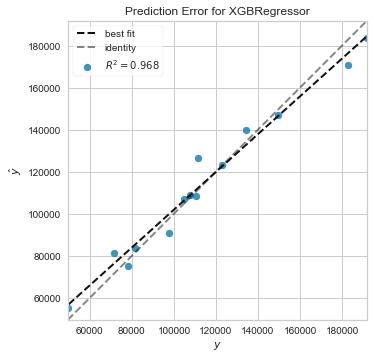

In [49]:
plot_model(tuned_xgboost, plot = 'error')

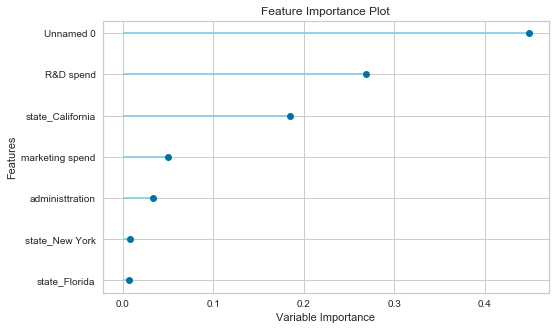

In [50]:
plot_model(tuned_xgboost, plot='feature')

In [58]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
predict_model(tuned_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,5553.5944,4.872503e+07,6980.3314,0.968,0.066,0.0535


In [60]:

final_xgboost = finalize_model(tuned_xgboost)

In [61]:
final_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)

In [62]:
predict_model(final_xgboost);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.0419,0.0026,0.0506,1.0,0.0,0.0


In [66]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Unnamed: 0,R&D spend,administtration,marketing spend,state,profit,Label
0,45,1000.23,124153.04,1903.93,New York,64926.08,64926.097656
1,46,1315.46,115816.21,297114.46,Florida,49490.75,49490.765625
2,47,0.00,135426.92,0.00,California,42559.73,42559.707031
3,48,542.05,51743.15,0.00,New York,35673.41,35673.406250
4,49,0.00,116983.80,45173.06,California,14681.40,14681.435547


In [67]:
save_model(final_xgboost,'Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [68]:
saved_final_xgboost = load_model('Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded
[20:33:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
new_prediction = predict_model(saved_final_xgboost, data=data_unseen)

In [70]:

new_prediction.head()

,Unnamed: 0,R&D spend,administtration,marketing spend,state,profit,Label
0,45,1000.23,124153.04,1903.93,New York,64926.08,64926.097656
1,46,1315.46,115816.21,297114.46,Florida,49490.75,49490.765625
2,47,0.00,135426.92,0.00,California,42559.73,42559.707031
3,48,542.05,51743.15,0.00,New York,35673.41,35673.406250
4,49,0.00,116983.80,45173.06,California,14681.40,14681.435547
